In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('DNN-EdgeIIoT-dataset.csv')

In [4]:
df

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219196,2021 23:24:32.816050000,166.75.162.225,192.168.0.128,0,0.0,0.0,0,31814.0,45620.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219197,2021 23:24:32.816595000,70.162.34.183,192.168.0.128,0,0.0,0.0,0,27718.0,45636.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219198,2021 23:24:32.818043000,40.13.95.244,192.168.0.128,0,0.0,0.0,0,18502.0,45672.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219199,2021 23:24:32.820831000,18.132.75.125,192.168.0.128,0,0.0,0.0,0,1862.0,45737.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [5]:
df.dtypes

frame.time             object
ip.src_host            object
ip.dst_host            object
arp.dst.proto_ipv4     object
arp.opcode            float64
                       ...   
mbtcp.len             float64
mbtcp.trans_id        float64
mbtcp.unit_id         float64
Attack_label            int64
Attack_type            object
Length: 63, dtype: object

In [6]:
df1=df['Attack_type']

In [7]:
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 
                "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
                "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
                "tcp.dstport", "udp.port", "mqtt.msg",'http.request.method','http.referer','http.request.version','http.response',
                'http.tls_port','dns.qry.name.len','mqtt.conack.flags','mqtt.protoname','mqtt.topic','Attack_type']

df.drop(drop_columns, axis=1, inplace=True)

df.dropna(axis=0, how='any', inplace=True)

df.drop_duplicates(subset=None, keep="first", inplace=True)

In [8]:
df.dtypes

arp.opcode                   float64
arp.hw.size                  float64
icmp.checksum                float64
icmp.seq_le                  float64
icmp.unused                  float64
http.content_length          float64
tcp.ack                      float64
tcp.ack_raw                  float64
tcp.checksum                 float64
tcp.connection.fin           float64
tcp.connection.rst           float64
tcp.connection.syn           float64
tcp.connection.synack        float64
tcp.flags                    float64
tcp.flags.ack                float64
tcp.len                      float64
tcp.seq                      float64
udp.stream                   float64
udp.time_delta               float64
dns.qry.name                 float64
dns.qry.qu                   float64
dns.qry.type                 float64
dns.retransmission           float64
dns.retransmit_request       float64
dns.retransmit_request_in    float64
mqtt.conflag.cleansess       float64
mqtt.conflags                float64
m

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sa=MinMaxScaler()

In [11]:
sa.fit_transform(df)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.7433049 , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.91907894, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.86438893, ..., 0.        , 0.        ,
        1.        ]])

In [12]:
# SVD
U, S, VT = np.linalg.svd(df, full_matrices=False)
df4 = pd.DataFrame(np.dot(U, np.dot(np.diag(S), VT)), columns=df.columns)
print("Original DataFrame:")
print(df)
print("\nDataFrame after SVD:")
print(df4)

Original DataFrame:
         arp.opcode  arp.hw.size  icmp.checksum  icmp.seq_le  icmp.unused  \
0               0.0          0.0            0.0          0.0          0.0   
1               0.0          0.0            0.0          0.0          0.0   
2               0.0          0.0            0.0          0.0          0.0   
3               0.0          0.0            0.0          0.0          0.0   
4               0.0          0.0            0.0          0.0          0.0   
...             ...          ...            ...          ...          ...   
2219162         0.0          0.0        35149.0      43815.0          0.0   
2219167         0.0          0.0        54603.0      44251.0          0.0   
2219181         0.0          0.0        48711.0      45298.0          0.0   
2219192         0.0          0.0        60230.0      45509.0          0.0   
2219193         0.0          0.0        56646.0      45523.0          0.0   

         http.content_length  tcp.ack   tcp.ack_raw  tc

In [13]:
df2=df1.iloc[:1904679]

In [14]:
df3=pd.DataFrame(df2)

In [15]:
df4

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.fin,...,mqtt.len,mqtt.msg_decoded_as,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
0,-1.771610e-17,-7.669882e-15,3.699940e-07,-2.615010e-08,-1.732631e-09,1.321702e-09,1.000000e+00,3.153346e+09,4.789200e+04,1.684528e-13,...,-1.498728e-12,-6.580349e-10,2.924879e-11,-9.906825e-10,-1.082881e-12,5.771507e-10,7.443578e-15,-1.593778e-15,1.432753e-13,6.203371e-13
1,1.158745e-16,7.648591e-15,-8.878140e-09,-1.137108e-09,7.240750e-09,-1.320132e-08,1.000000e+00,3.447945e+08,1.607700e+04,-7.659275e-13,...,1.200000e+01,2.288181e-10,1.000000e+00,4.000000e+00,1.145627e-11,4.000000e+00,-6.913643e-14,6.024175e-14,-1.538993e-12,-5.555833e-12
2,-2.418004e-17,-8.516504e-15,3.711111e-07,-2.631844e-08,-1.763683e-10,1.298310e-09,1.500000e+01,3.153346e+09,6.267500e+04,1.943361e-13,...,-1.533314e-12,-3.719274e-10,2.326294e-10,-1.114901e-10,-1.092583e-12,2.957360e-11,7.859204e-15,1.236858e-15,1.399561e-13,6.086243e-13
3,-1.688470e-17,-7.318894e-15,4.185070e-07,-2.533337e-08,1.667586e-09,2.601850e-10,1.500000e+01,3.153346e+09,5.446900e+04,1.537466e-13,...,2.000000e+00,8.235255e-11,2.000000e+00,2.381897e-09,-2.306539e-13,-2.380700e-09,1.743115e-15,2.010544e-15,2.352948e-14,1.065536e-13
4,-1.630625e-16,-3.189268e-12,1.134976e-07,-2.228975e-09,3.834441e-05,-1.807431e-09,4.999999e+00,3.447945e+08,5.381200e+04,1.869779e-10,...,3.900000e+01,4.059594e-06,2.999989e+00,8.995345e-07,2.400000e+01,8.662041e-07,-1.905129e-12,-9.835156e-13,5.437006e-10,3.843033e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904674,-5.936191e-17,-1.991825e-14,3.514900e+04,4.381500e+04,-4.169073e-10,6.899028e-11,-3.317034e-07,-3.839528e-06,-1.247691e-10,-2.736662e-13,...,-1.501058e-13,7.087136e-12,-2.169330e-11,1.481975e-12,-4.095657e-14,4.302494e-12,-3.328324e-16,-2.184023e-15,4.406954e-15,1.000000e+00
1904675,1.348278e-16,-1.502338e-14,5.460300e+04,4.425100e+04,-1.019240e-09,3.716382e-10,-7.118557e-07,-5.682791e-06,-1.817290e-10,4.812146e-14,...,-3.852034e-13,3.469949e-11,-1.715790e-10,3.838334e-12,-2.631758e-13,7.432469e-14,1.162221e-15,-3.072035e-15,3.486422e-14,1.000000e+00
1904676,6.507037e-17,-1.730648e-14,4.871100e+04,4.529800e+04,-8.636154e-10,2.961588e-10,-5.892521e-07,-5.155303e-06,-1.648108e-10,-7.072079e-14,...,-3.397490e-13,2.633181e-11,-1.344626e-10,1.894536e-12,-2.100810e-13,-5.248621e-13,7.658467e-16,-2.963311e-15,2.744577e-14,1.000000e+00
1904677,1.804895e-16,-1.437613e-14,6.023000e+04,4.550900e+04,-1.219348e-09,4.747137e-10,-8.146445e-07,-6.242145e-06,-1.985423e-10,1.206708e-13,...,-4.779237e-13,4.585413e-11,-2.214481e-10,6.111860e-12,-3.410851e-13,3.660506e-13,1.648782e-15,-3.482869e-15,4.540552e-14,1.000000e+00


In [16]:
df4.shape

(1904679, 38)

In [17]:
df4['Attack_type']=df3['Attack_type'].values

In [18]:
df4

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.fin,...,mqtt.msg_decoded_as,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,-1.771610e-17,-7.669882e-15,3.699940e-07,-2.615010e-08,-1.732631e-09,1.321702e-09,1.000000e+00,3.153346e+09,4.789200e+04,1.684528e-13,...,-6.580349e-10,2.924879e-11,-9.906825e-10,-1.082881e-12,5.771507e-10,7.443578e-15,-1.593778e-15,1.432753e-13,6.203371e-13,Normal
1,1.158745e-16,7.648591e-15,-8.878140e-09,-1.137108e-09,7.240750e-09,-1.320132e-08,1.000000e+00,3.447945e+08,1.607700e+04,-7.659275e-13,...,2.288181e-10,1.000000e+00,4.000000e+00,1.145627e-11,4.000000e+00,-6.913643e-14,6.024175e-14,-1.538993e-12,-5.555833e-12,Normal
2,-2.418004e-17,-8.516504e-15,3.711111e-07,-2.631844e-08,-1.763683e-10,1.298310e-09,1.500000e+01,3.153346e+09,6.267500e+04,1.943361e-13,...,-3.719274e-10,2.326294e-10,-1.114901e-10,-1.092583e-12,2.957360e-11,7.859204e-15,1.236858e-15,1.399561e-13,6.086243e-13,Normal
3,-1.688470e-17,-7.318894e-15,4.185070e-07,-2.533337e-08,1.667586e-09,2.601850e-10,1.500000e+01,3.153346e+09,5.446900e+04,1.537466e-13,...,8.235255e-11,2.000000e+00,2.381897e-09,-2.306539e-13,-2.380700e-09,1.743115e-15,2.010544e-15,2.352948e-14,1.065536e-13,Normal
4,-1.630625e-16,-3.189268e-12,1.134976e-07,-2.228975e-09,3.834441e-05,-1.807431e-09,4.999999e+00,3.447945e+08,5.381200e+04,1.869779e-10,...,4.059594e-06,2.999989e+00,8.995345e-07,2.400000e+01,8.662041e-07,-1.905129e-12,-9.835156e-13,5.437006e-10,3.843033e-11,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904674,-5.936191e-17,-1.991825e-14,3.514900e+04,4.381500e+04,-4.169073e-10,6.899028e-11,-3.317034e-07,-3.839528e-06,-1.247691e-10,-2.736662e-13,...,7.087136e-12,-2.169330e-11,1.481975e-12,-4.095657e-14,4.302494e-12,-3.328324e-16,-2.184023e-15,4.406954e-15,1.000000e+00,Vulnerability_scanner
1904675,1.348278e-16,-1.502338e-14,5.460300e+04,4.425100e+04,-1.019240e-09,3.716382e-10,-7.118557e-07,-5.682791e-06,-1.817290e-10,4.812146e-14,...,3.469949e-11,-1.715790e-10,3.838334e-12,-2.631758e-13,7.432469e-14,1.162221e-15,-3.072035e-15,3.486422e-14,1.000000e+00,Vulnerability_scanner
1904676,6.507037e-17,-1.730648e-14,4.871100e+04,4.529800e+04,-8.636154e-10,2.961588e-10,-5.892521e-07,-5.155303e-06,-1.648108e-10,-7.072079e-14,...,2.633181e-11,-1.344626e-10,1.894536e-12,-2.100810e-13,-5.248621e-13,7.658467e-16,-2.963311e-15,2.744577e-14,1.000000e+00,Vulnerability_scanner
1904677,1.804895e-16,-1.437613e-14,6.023000e+04,4.550900e+04,-1.219348e-09,4.747137e-10,-8.146445e-07,-6.242145e-06,-1.985423e-10,1.206708e-13,...,4.585413e-11,-2.214481e-10,6.111860e-12,-3.410851e-13,3.660506e-13,1.648782e-15,-3.482869e-15,4.540552e-14,1.000000e+00,Vulnerability_scanner


In [19]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904679 entries, 0 to 1904678
Data columns (total 39 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   arp.opcode                 float64
 1   arp.hw.size                float64
 2   icmp.checksum              float64
 3   icmp.seq_le                float64
 4   icmp.unused                float64
 5   http.content_length        float64
 6   tcp.ack                    float64
 7   tcp.ack_raw                float64
 8   tcp.checksum               float64
 9   tcp.connection.fin         float64
 10  tcp.connection.rst         float64
 11  tcp.connection.syn         float64
 12  tcp.connection.synack      float64
 13  tcp.flags                  float64
 14  tcp.flags.ack              float64
 15  tcp.len                    float64
 16  tcp.seq                    float64
 17  udp.stream                 float64
 18  udp.time_delta             float64
 19  dns.qry.name               float64
 20  dn

<AxesSubplot:xlabel='Attack_type', ylabel='count'>

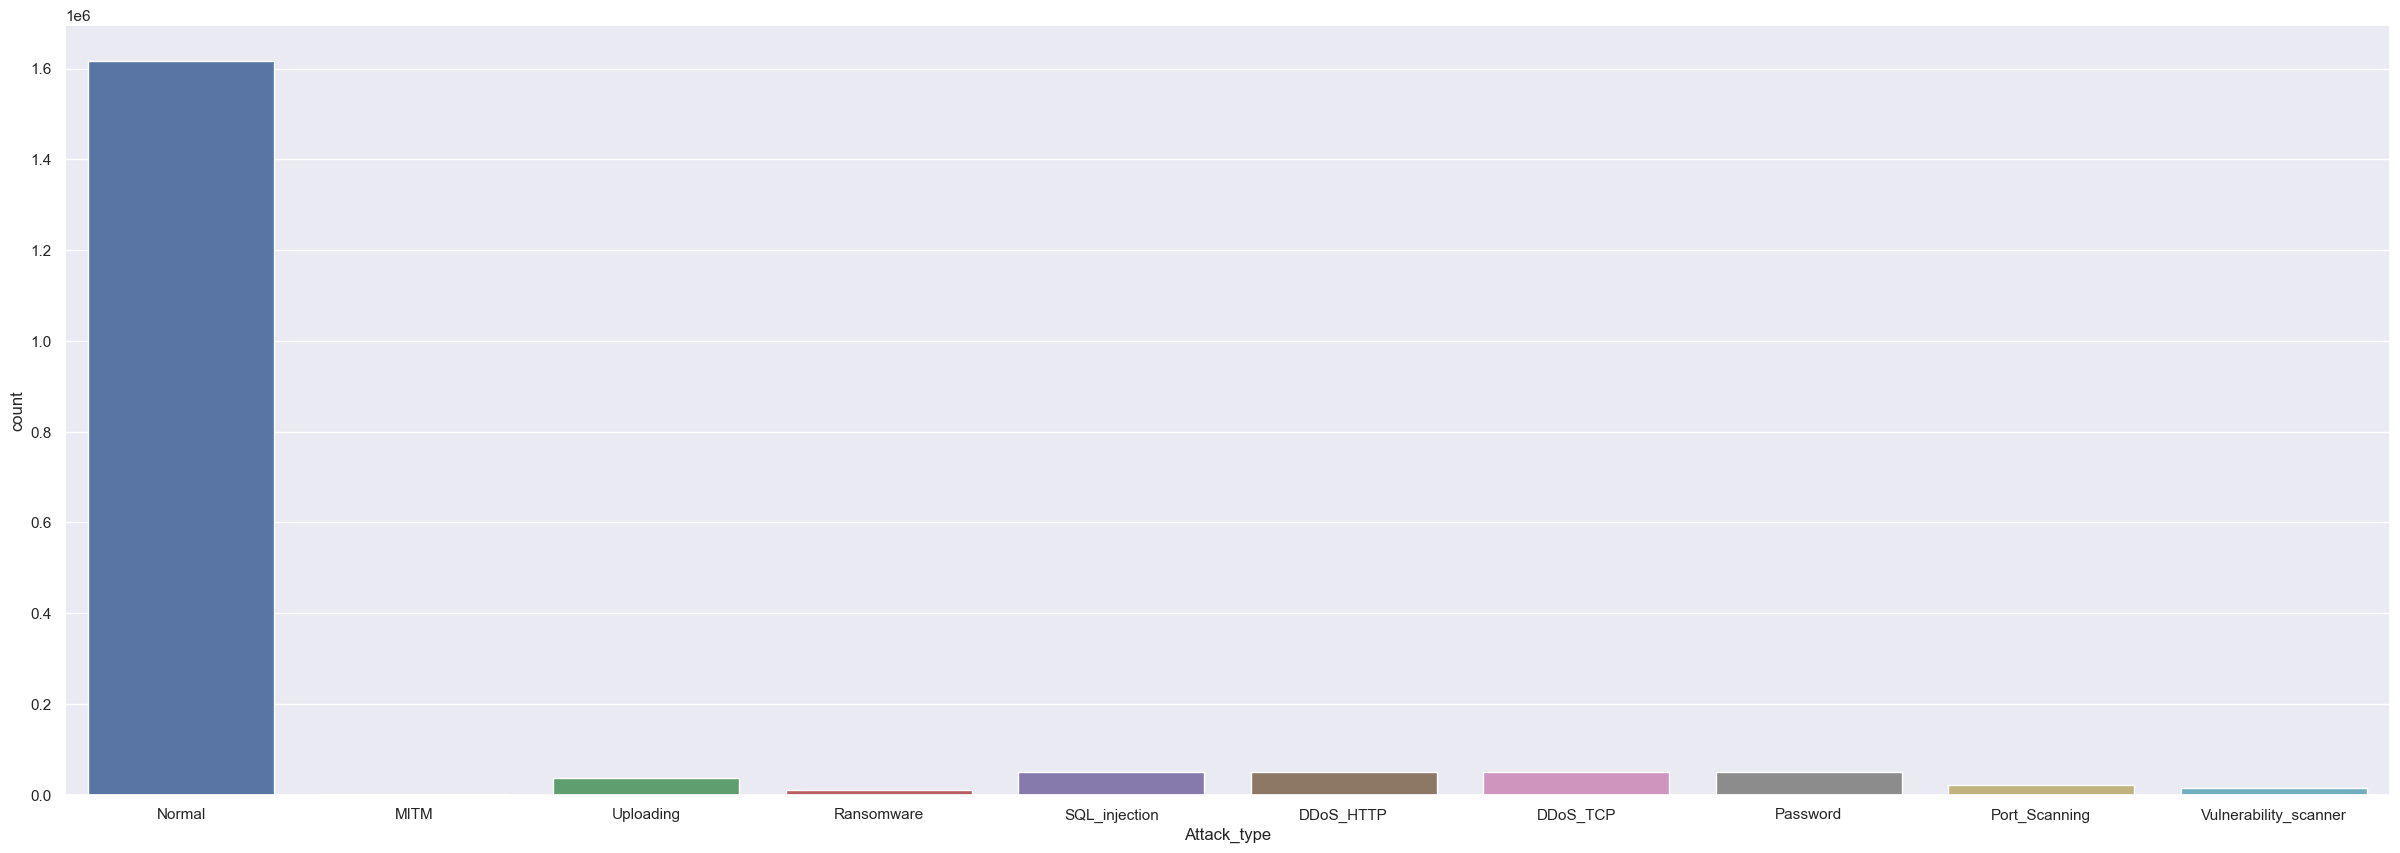

In [20]:
sns.set(style="darkgrid")
plt.figure(figsize=(30,10))
sns.countplot(data = df4, x = 'Attack_type')

In [21]:
df4.shape

(1904679, 39)

In [22]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904679 entries, 0 to 1904678
Data columns (total 39 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   arp.opcode                 float64
 1   arp.hw.size                float64
 2   icmp.checksum              float64
 3   icmp.seq_le                float64
 4   icmp.unused                float64
 5   http.content_length        float64
 6   tcp.ack                    float64
 7   tcp.ack_raw                float64
 8   tcp.checksum               float64
 9   tcp.connection.fin         float64
 10  tcp.connection.rst         float64
 11  tcp.connection.syn         float64
 12  tcp.connection.synack      float64
 13  tcp.flags                  float64
 14  tcp.flags.ack              float64
 15  tcp.len                    float64
 16  tcp.seq                    float64
 17  udp.stream                 float64
 18  udp.time_delta             float64
 19  dns.qry.name               float64
 20  dn

In [23]:
# Get column names of object datatype columns
object_cols = [col for col in df4.select_dtypes(include='object').columns if col != 'Attack_type']

# Apply get_dummies to all object columns
df4 = pd.get_dummies(df4, columns=object_cols)

In [24]:
X = df4.drop(['Attack_type'], axis =1)
y = df4['Attack_type']

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = pd.get_dummies(y)

In [26]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
X_train.shape

(1523743, 38)

In [46]:
y_train.shape

(1523743, 10)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define model architecture
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Define custom weights for first layer
custom_weights = [np.random.rand(X_train.shape[1], 64), np.zeros(64)]
model.layers[0].set_weights(custom_weights)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                2496      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 10)                170       
                                                                 
Total params: 5274 (20.60 KB)
Trainable params: 5274 (20.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
38094/38094 [==============================] - 71s 2ms/step - loss: 0.1969 - accuracy: 0.9223 - val_loss: 0.1792 - val_accuracy: 0.9273
Epoch 2/5
38094/38094 [==============================] - 69s 2ms/step - loss: 0.1736 - accuracy: 0.9299 - val_loss: 0.1728 - val_accuracy: 0.9307
Epoch 3/5
38094/38094 [==============================] - 66s 2ms/step - loss: 0.1668 - accuracy: 0.9329 - val_loss: 0.1815 - val_accuracy: 0.9299
Epoch 4/5
38094/38094 [==============================] - 62s 2ms/step - loss: 0.1621 - accuracy: 0.9363 - val_loss: 0.1718 - val_accuracy: 0.9352
Epoch 5/5
38094/38094 [==============================] - 62s 2ms/step - loss: 0.1593 - accuracy: 0.9376 - val_loss: 0.1584 - val_accuracy: 0.9430


<Figure size 640x480 with 0 Axes>

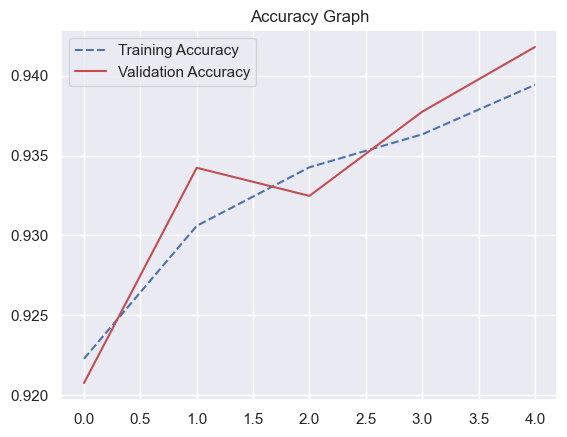

<Figure size 640x480 with 0 Axes>

In [38]:
# To plot training accuracy
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', linestyle='dashed', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Graph')
plt.figure()

<Figure size 640x480 with 0 Axes>

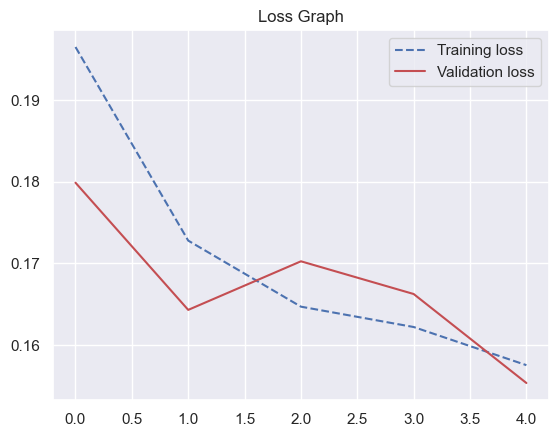

<Figure size 640x480 with 0 Axes>

In [39]:
# To plot training loss
loss = history.history['loss'] #Training loss
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss,'b',linestyle='dashed',  label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss Graph')
plt.legend()
plt.figure()

In [40]:
# Evaluate the model
y_pred = model.predict(X_test)

11905/11905 [==============================] - 14s 1ms/step


In [41]:
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test.values.argmax(axis=-1)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [43]:
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"f1: {f1}")

Accuracy: 0.9417723712119621
Precision: 0.9224876175398479
Recall: 0.9417723712119621
f1: 0.929909759632416
